In [1]:
import fastai
from fastai.vision.all import *
from icevision.models import *
from icevision.all import *
from mmcv.runner import (
    load_checkpoint,
    save_checkpoint,
    _load_checkpoint,
    load_state_dict,
)
import cv2
import imagesize
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import json

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.width',1000)

In [2]:
fluke = pd.read_csv("keypoints.csv", low_memory = False)

In [3]:
fluke.head()

filename  1_x  1_y  2_x  2_y  3_x  3_y    4_x    4_y     5_x    5_y     6_x    6_y    7_x    7_y  8_x  8_y  9_x  9_y  0_x  0_y
0  0000e88ab.jpg  253  236  529  295  543  309  552.0  292.0   860.0  161.0   853.0  230.0  633.0  404.0  538  436  442  441  234  318
1  00029d126.jpg   21   90  345  153  357  167  376.0  155.0   740.0   87.0   711.0  122.0  472.0  236.0  315  259  140  237    9  129
2  00050a15a.jpg   27  277  498  203  508  211  531.0  198.0  1030.0  299.0   991.0  307.0  572.0  370.0  503  370  421  369   46  290
3  0005c1ef8.jpg   23  158  523  199  531  210  539.0  199.0  1009.0  222.0  1001.0  249.0  731.0  314.0  528  329  434  327   22  196
4  0006e997e.jpg   25   47  444  105  444  122  453.0  114.0   956.0   31.0   917.0   54.0  510.0  181.0  419  211  278  252   28   79

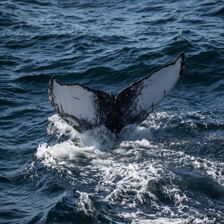

In [4]:
img = Image.open(Path(fluke["filename"][0])).resize((224, 224))
img

In [5]:
def plot_keypoints(filename, points):
    '''
    filename - jpg file
    points - coordinates
    '''
    img = Image.open(Path(filename))
    
    fig, ax = plt.subplots(1, figsize = (20, 20))
    ax.set_aspect('equal')
    
    for coords in points :
        ax.add_patch(Circle(coords, 10, linewidth = '2', edgecolor = 'yellow', facecolor = 'red'))
    ax.imshow(img)
    plt.show()

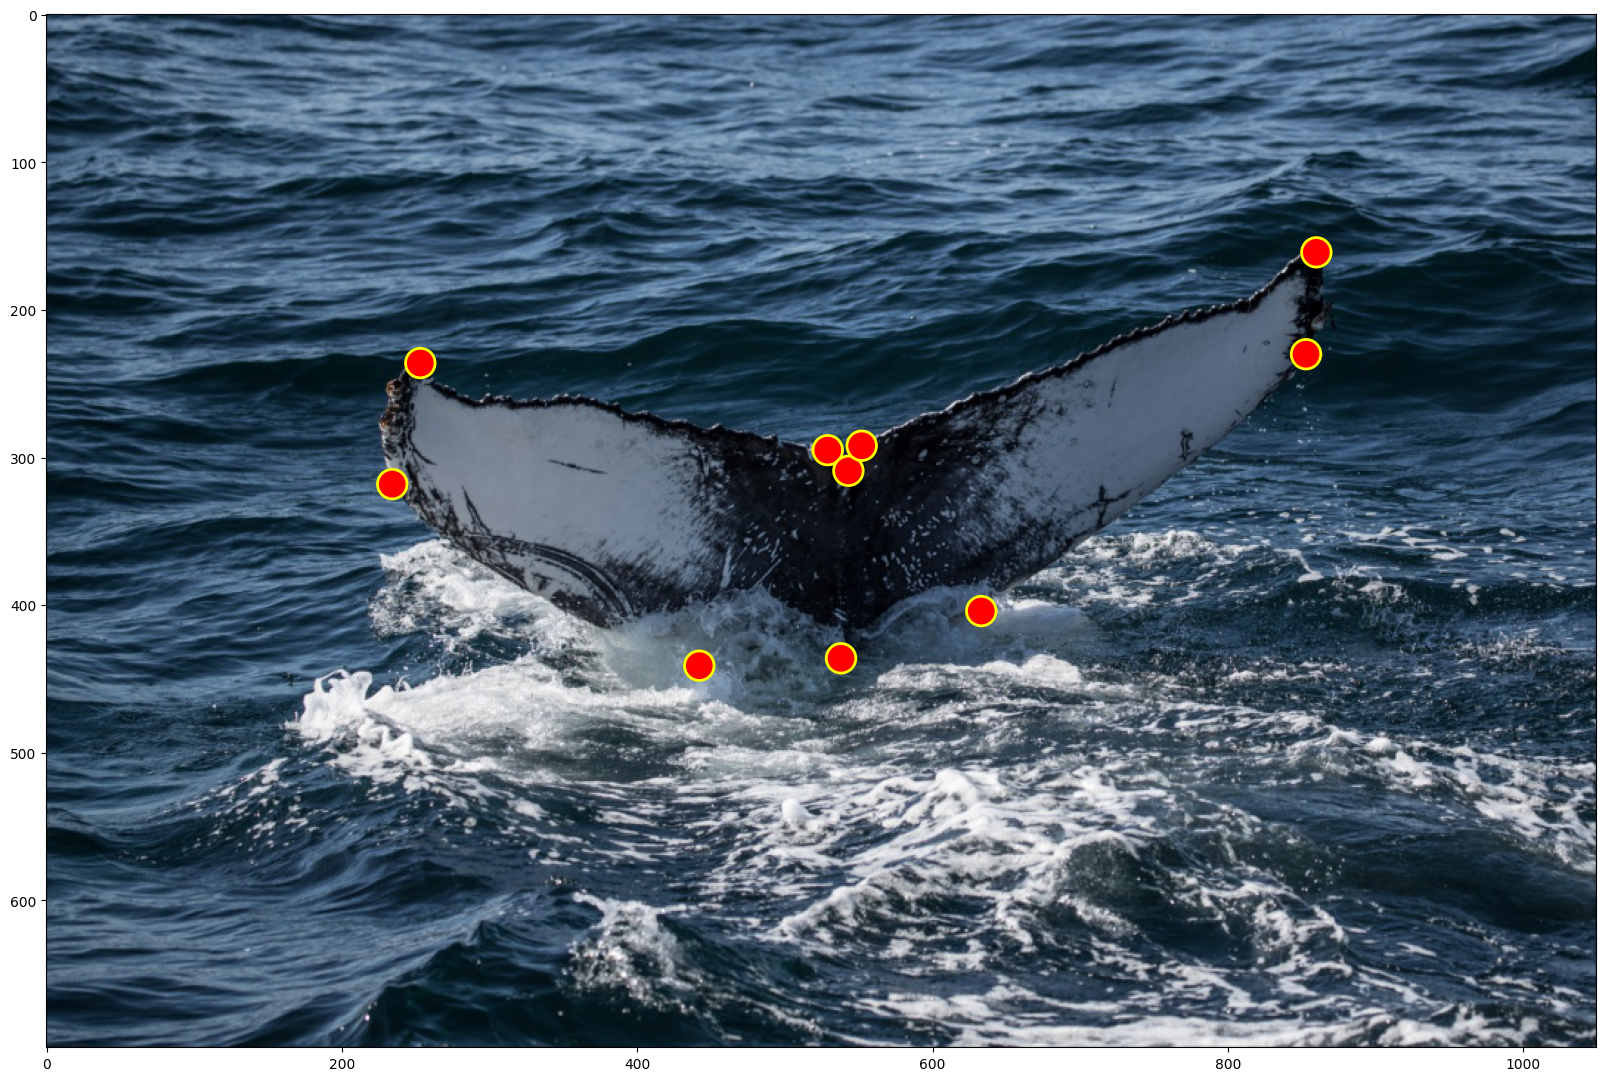

In [6]:
filename = fluke.iloc[0, 0]
points = fluke.iloc[0, 1:]
keypoints = []
for i in range(len(points) // 2):
    keypoints.append((points[2*i], points[(2*i) + 1]))
plot_keypoints(filename, keypoints)

In [7]:
keypoints

[(253, 236),
 (529, 295),
 (543, 309),
 (552.0, 292.0),
 (860.0, 161.0),
 (853.0, 230.0),
 (633.0, 404.0),
 (538, 436),
 (442, 441),
 (234, 318)]

In [8]:
def bounding_rectangle(points):
    x0, y0 = points[0]
    x1, y1 = x0, y0
    for x,y in points[1:] :
        x0 = min(x0, x)
        y0 = min(y0, y)
        x1 = max(x1, x)
        y1 = max(y1, y)
    
    return x0, y0, x1, y1

In [9]:
points = bounding_rectangle(keypoints)

In [10]:
points
points = [(points[0], points[1]), (points[2], points[3])]

In [11]:
points

[(234, 161.0), (860.0, 441)]

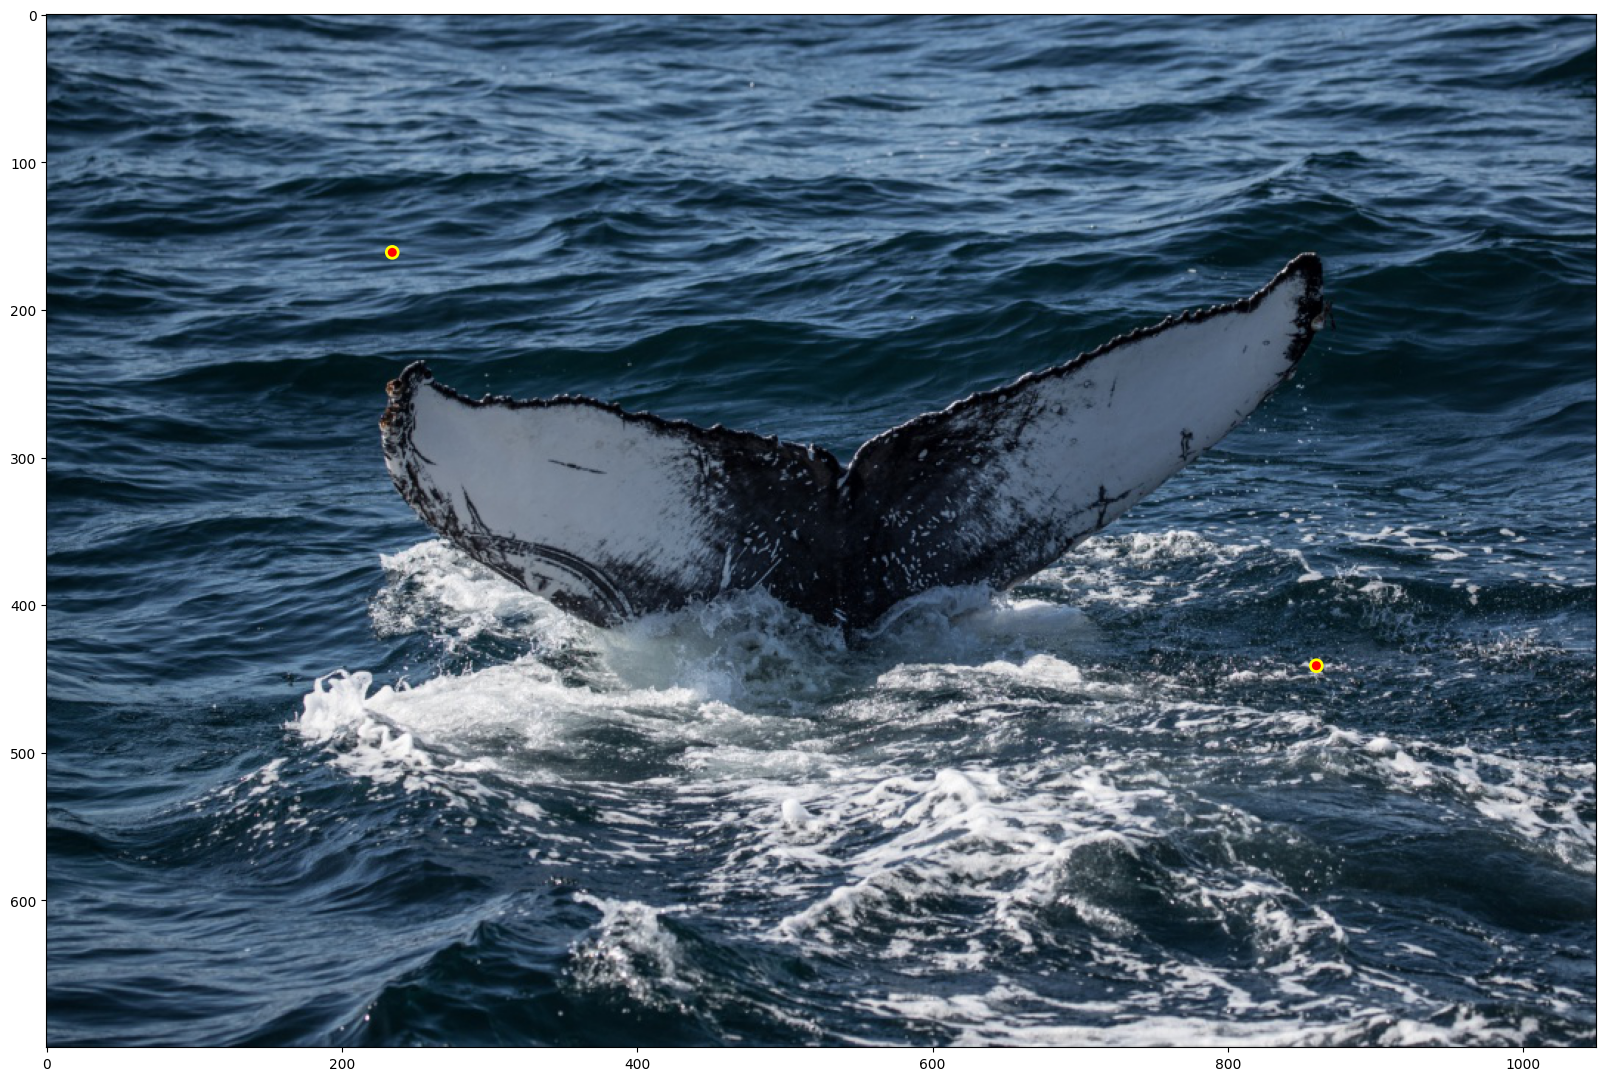

In [12]:
img = Image.open(Path(filename))
    
fig, ax = plt.subplots(1, figsize = (20, 20))
ax.set_aspect('equal')
    
for coords in points :
    ax.add_patch(Circle(coords, 4, linewidth = '2', edgecolor = 'yellow', facecolor = 'red'))
ax.imshow(img)
plt.show()